In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
file_path = 'stores_sales_forecasting.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [4]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [5]:
missing_values = data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [6]:
data.describe()


,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,2016-04-30 03:54:13.748231680,55726.556341,349.834887,3.785007,0.173923,8.699327
min,1.000000,2014-01-06 00:00:00,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,2015-05-26 00:00:00,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,2016-06-20 00:00:00,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,2017-05-14 00:00:00,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,2017-12-30 00:00:00,99301.000000,4416.174000,14.000000,0.700000,1013.127000
std,2885.740258,NaN,32261.888225,503.179145,2.251620,0.181547,136.049246


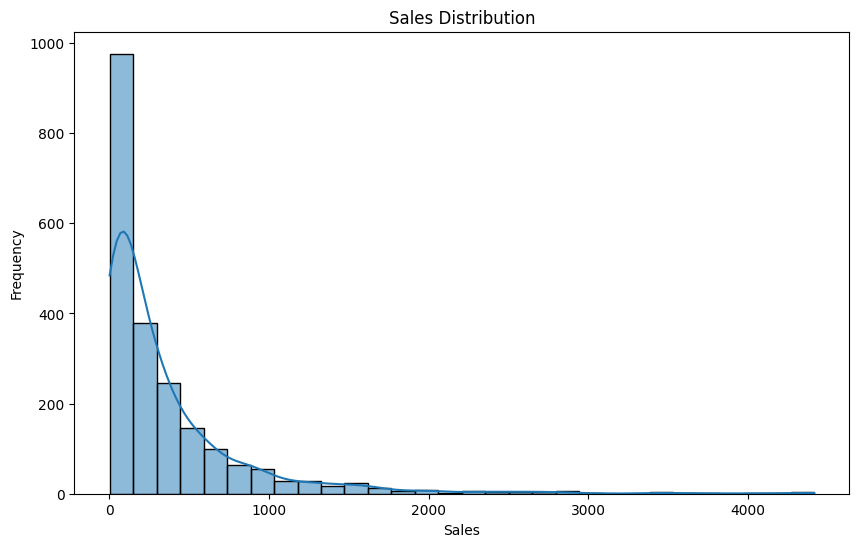

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], kde=True, bins=30)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

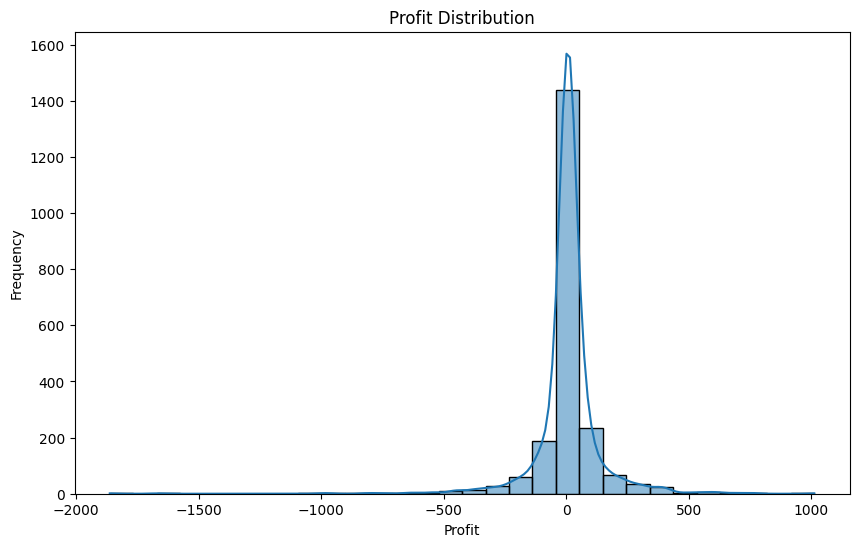

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Profit'], kde=True, bins=30)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


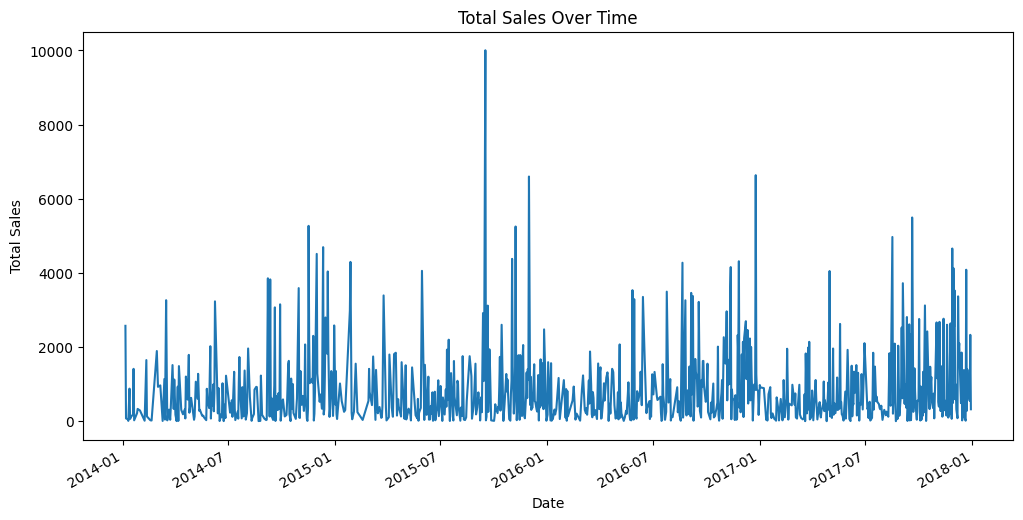

In [9]:
sales_over_time = data.groupby('Order Date')['Sales'].sum()
plt.figure(figsize=(12, 6))
sales_over_time.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [10]:
monthly_sales = sales_over_time.resample('M').sum()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


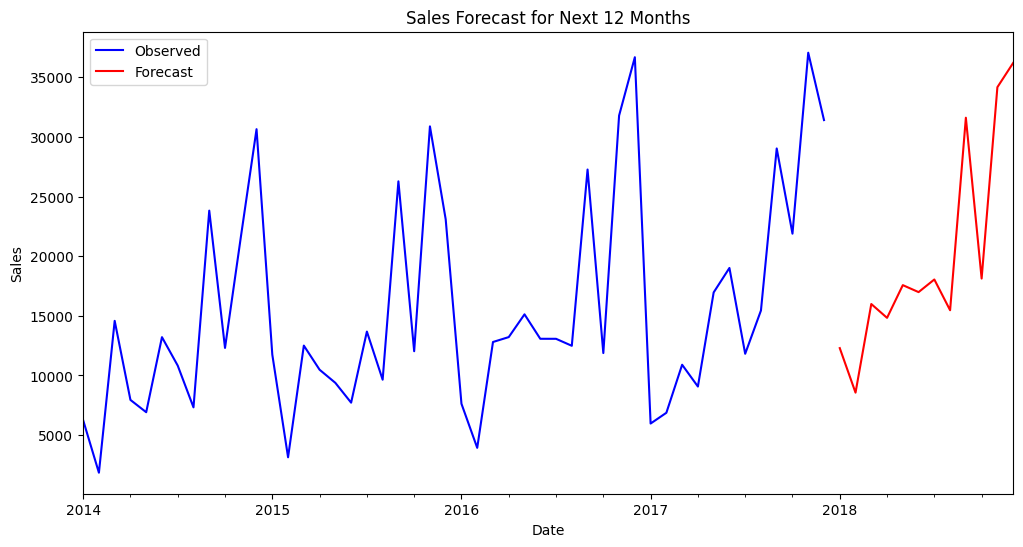

In [11]:
model = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

# Forecast for the next 12 months
forecast = fit_model.forecast(12)

# Plotting the forecast
plt.figure(figsize=(12, 6))
monthly_sales.plot(label='Observed', color='blue')
forecast.plot(label='Forecast', color='red')
plt.title('Sales Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()